<a href="https://colab.research.google.com/github/lazuwarda/Analisis-Data/blob/main/Analisis_Data_Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYEK ANALISIS DATA : Bike Sharing Dataset**
* Nama: Naufatul Lazuwarda
* Email: naufalazuwarda@gmail.com
* ID Dicoding: naufalazuwarda

### Informasi Dataset

**Background**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


**Data Set**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


**Dataset characteristics**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Pertanyaan Bisnis

1. Pada musim dan cuaca apa sepeda paling banyak dan paling sedikit disewa?
2. Pada pukul berapa penyewaan sepeda terbanyak?
3. Adakah perbedaan kebiasaan peminjaman user casual dan registered tiap harinya?
4. Bagaimana penyewaan sepeda pada saat holiday dan workingday?

### PREPARING

In [ ]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 4.0.0
    Uninstalling platformdirs-4.0.0:
      Successfully uninstalled platformdirs-4.0.0


In [ ]:
!virtualenv venv

created virtual environment CPython3.10.12.final.0-64 in 1731ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==68.2.2, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source venv/bin/activate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### 1. Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
day_df = pd.read_csv('drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('drive/MyDrive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2. Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


1. Kesalahan tipe data 'dteday', harusnya timestamp
2. Type data 'season', 'yr', 'mnth','holiday' ,'workingday', dan 'weathersit' harusnya categorical

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


1. Kesalahan tipe data 'dteday', harusnya timestamp
2. Type data 'season', 'yr', 'mnth','holiday' ,'workingday', dan 'weathersit' harusnya categorical

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


KESIMPULAN:
Diteukan kesalahan tipe data pada kolom 'dteday', 'season', 'yr', 'mnth','holiday' ,'workingday', dan 'weathersit' pada data frame day_df dan hour_df

### 3. Data Cleaning

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

categorical_columns =["season","yr","mnth","holiday","workingday","weathersit"]

for column in categorical_columns:
  day_df[column] = day_df[column].astype("category")

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

categorical_columns =["season","yr","mnth","holiday","workingday","weathersit"]

for column in categorical_columns:
  hour_df[column] = hour_df[column].astype("category")

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
day_df['season']=day_df['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df['season']=hour_df['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analisis

In [ ]:
day_df.describe(include="all")

<ipython-input-18-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.0,731.0,731.0,731.000000,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2.0,12.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,1.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366.0,62.0,710.0,NaN,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,2.004787,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Mengidentifikasi banyaknya sepeda yang disewakan berdasarkan musim (season)

In [ ]:
cs = day_df.casual.sum()
print("Banyaknya peminjaman dari casual user = ", cs)
rs = day_df.registered.sum()
print("Banyaknya peminjaman dari registered user = ", rs)

Banyaknya peminjaman dari casual user =  620017
Banyaknya peminjaman dari registered user =  2672662


In [ ]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Musim dengan penyewaan sepeda terbanyak adalah musim Fall dan paling sedikit pada musim Spring.

In [ ]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

Banyaknya sepeda yang disewakan paling banyak pada weathersit dengan kategori 1 dan tidak ada sepeda yang disewakan pada saat weathersit memasuki kategori 4
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
day_df.groupby(by="mnth").casual.sum().sort_values(ascending=False)

mnth
7     78157
5     75285
6     73906
8     72039
9     70323
4     60802
10    59760
3     44444
11    36603
12    21693
2     14963
1     12042
Name: casual, dtype: int64

Peminjaman sepeda oleh casual user terbanyak terjadi pada bulan Juli, Mei dan Juni

In [ ]:
day_df.groupby(by="mnth").registered.sum().sort_values(ascending=False)

mnth
8     279155
9     275668
6     272436
7     266791
10    262592
5     256401
11    218228
4     208292
12    189343
3     184476
2     136389
1     122891
Name: registered, dtype: int64

Peminjaman sepeda oleh registered user terbanyak pada bulan Agustus, September dan Juni

In [ ]:
day_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

Secara keseluruhan puncak peminjaman sepeda terjadi pada bulan Agustus, Juni dan September

In [ ]:
day_df.groupby(by="season").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
season,,,
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


Peminjaman sepeda terbanyak pada musim Fall dan paling sedikit pada musim Spring

In [ ]:
day_df.groupby(by="holiday").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [ ]:
day_df.groupby(by="workingday").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [ ]:
day_df.groupby(by="weekday").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [ ]:
hour_df.describe(include="all")

<ipython-input-29-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.0,17379.0,17379.000000,17379.0,17379.000000,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12.0,NaN,2.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,5.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488.0,NaN,16879.0,NaN,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,2.005771,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
hour_df.groupby(by="hr").casual.sum().sort_values(ascending=False)

hr
14    55089
15    54606
17    54220
16    53834
13    52713
12    49718
18    44496
11    43286
19    35505
10    33789
20    26378
9     22458
21    20570
22    16200
8     15761
23    11065
7      8037
0      7375
1      4709
2      3412
6      3017
3      1893
5      1012
4       874
Name: casual, dtype: int64

Casual user melakukan peminjaman terbanyak pada jam 14, 15 dan 17

In [ ]:
hour_df.groupby(by="hr").registered.sum().sort_values(ascending=False)

hr
17    282640
18    265276
8     245240
19    191284
16    173914
7     146134
20    138172
9     136980
12    134696
13    132206
15    128543
14    120563
11    108034
21    104875
10     92468
22     79412
23     52876
6      52115
0      31755
1      19455
5      13249
2      12940
3       6281
4       3554
Name: registered, dtype: int64

Registered User melakukan peminjaman terbanyak pada jam 17,18, dan 8

In [ ]:
hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Secara keseluruhan peminjaman terbanyak terjadi pada pukul 17, 18, dan 8

In [ ]:
hour_df.groupby(by="hr").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [ ]:
day_df.groupby(by="weekday").agg({
    "casual": sum,
    "registered": sum,
    "cnt":  sum
})

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [ ]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)

## Data Visualization

### 1. Pada musim dan cuaca apa sepeda paling banyak dan paling sedikit disewa?

[Text(0.5, 1.0, 'Count of Bike by Weathersit')]

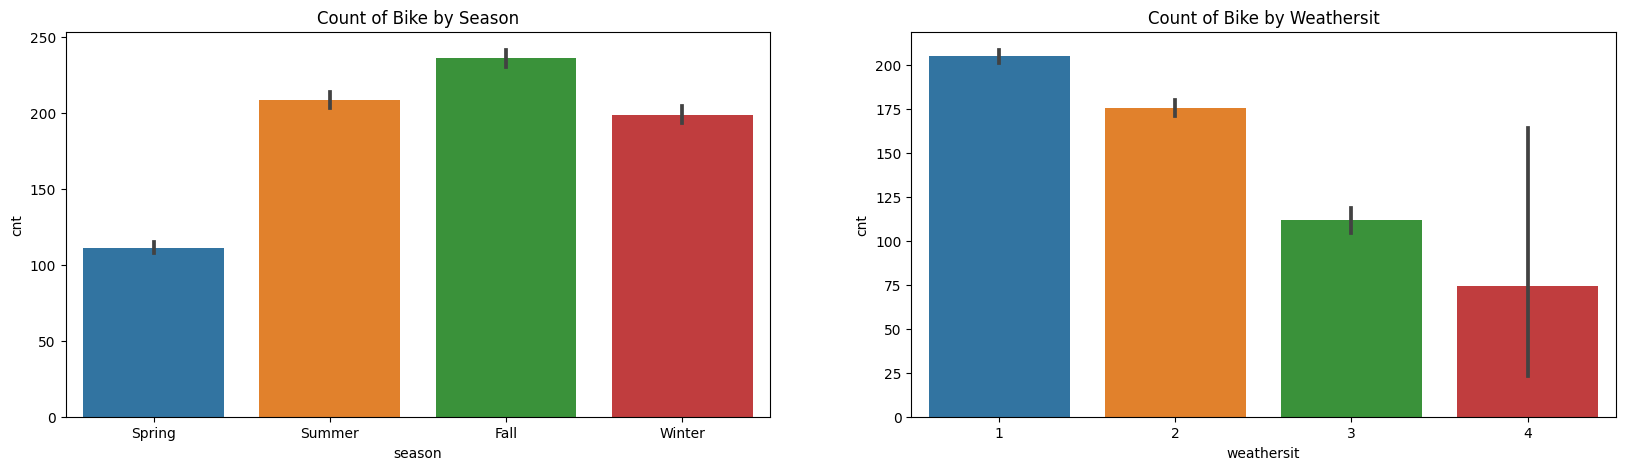

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (20,5))
sns.barplot(data = hour_df , x ='season' , y ='cnt', ax=ax[0])
sns.barplot(data = hour_df , x ='weathersit' , y ='cnt', ax=ax[1])
ax[0].set(title='Count of Bike by Season')
ax[1].set(title='Count of Bike by Weathersit')

[Text(0.5, 1.0, 'Count of Bike by Weathersit')]

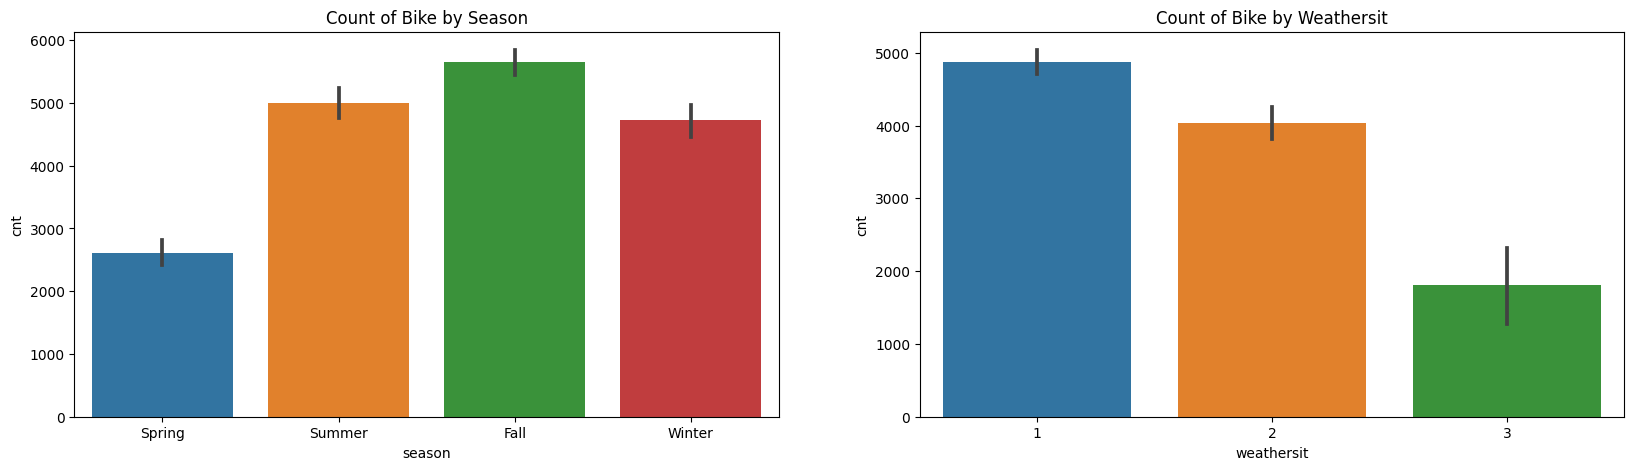

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (20,5))
sns.barplot(data = day_df , x ='season' , y ='cnt', ax=ax[0])
sns.barplot(data = day_df , x ='weathersit' , y ='cnt', ax=ax[1])
ax[0].set(title='Count of Bike by Season')
ax[1].set(title='Count of Bike by Weathersit')

### 2. Pada pukul berapa penyewaan sepeda terbanyak?

Text(0.5, 1.0, 'Bike Sharing per Hour (All User)')

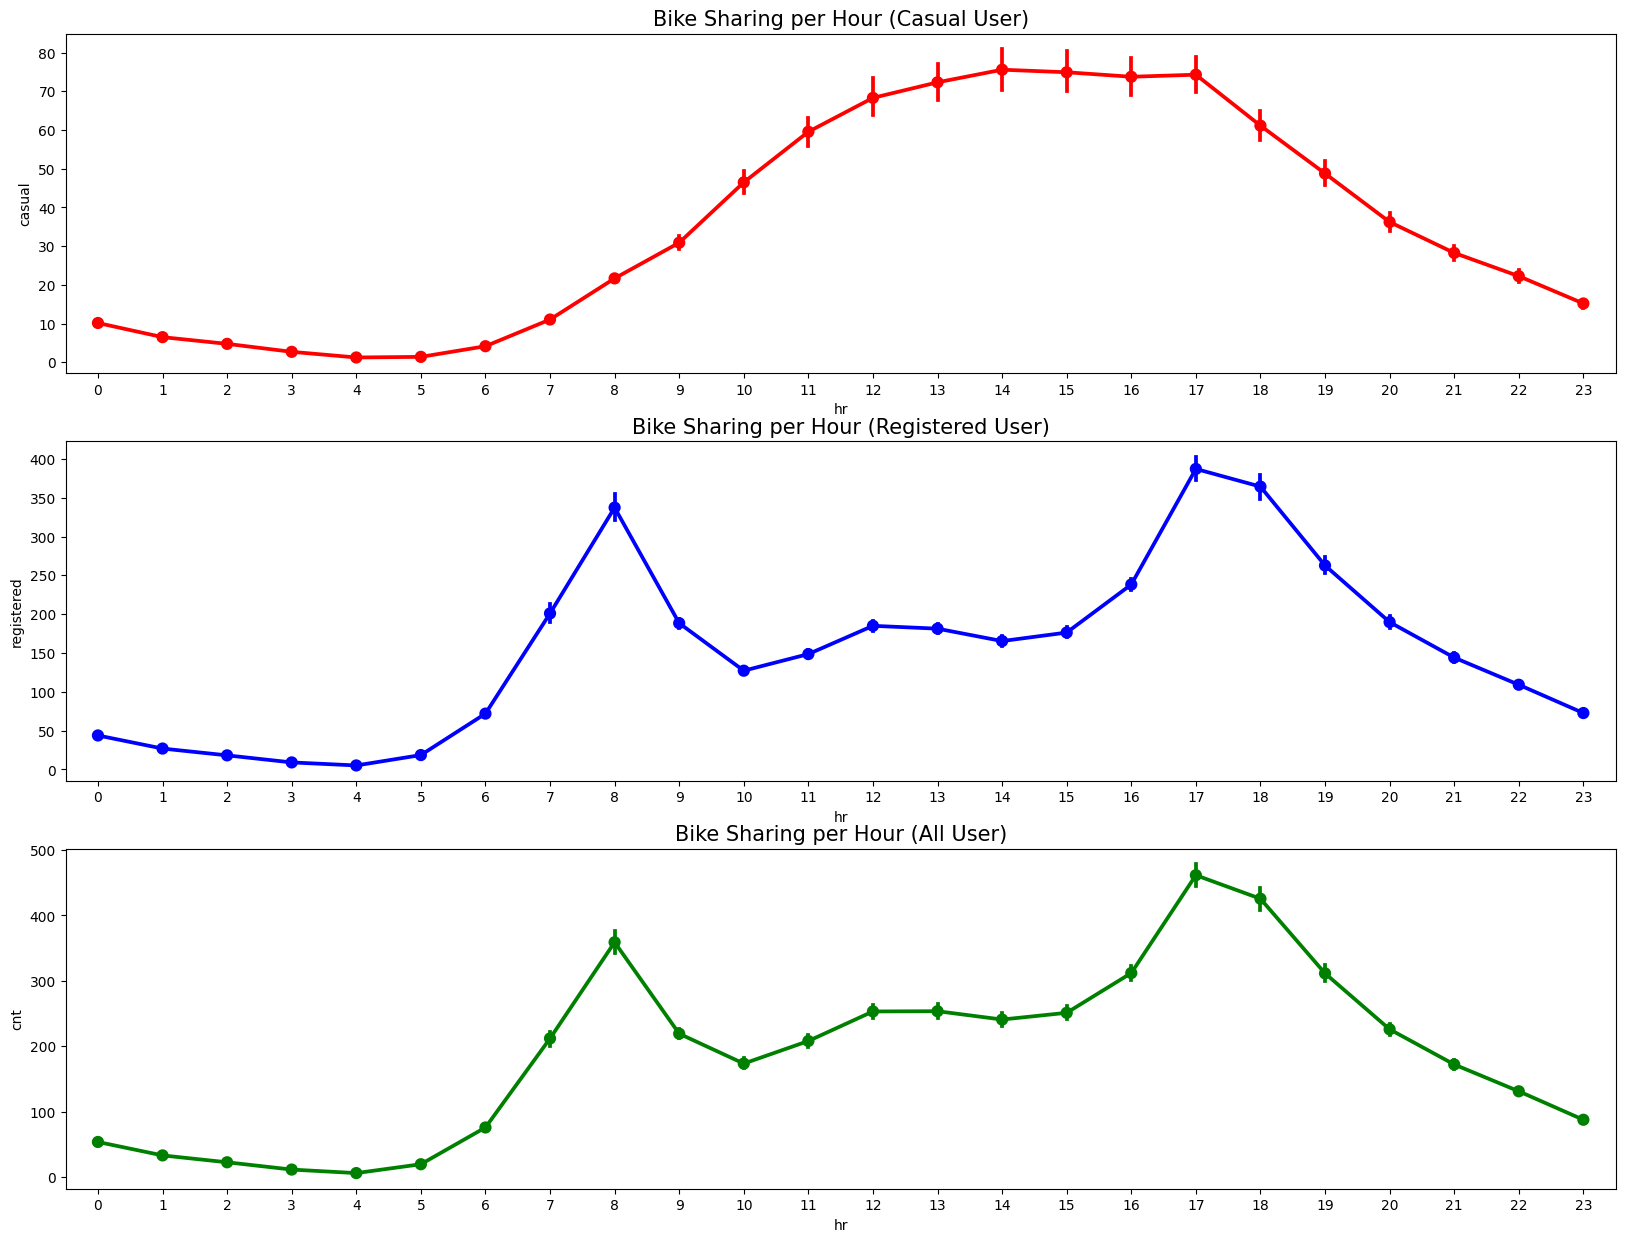

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize = (20,15))
sns.pointplot(data = hour_df , x ='hr' , y ='casual', color='red', ax=ax[0])
ax[0].set_title("Bike Sharing per Hour (Casual User)", loc="center", fontsize=15)
sns.pointplot(data = hour_df , x ='hr' , y ='registered', color='blue', ax=ax[1])
ax[1].set_title("Bike Sharing per Hour (Registered User)", loc="center", fontsize=15)
sns.pointplot(data = hour_df , x ='hr' , y ='cnt', color='green', ax=ax[2])
ax[2].set_title("Bike Sharing per Hour (All User)", loc="center", fontsize=15)

### 3. Adakah perbedaan kebiasaan peminjaman user casual dan registered tiap harinya?

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends by registered user')]

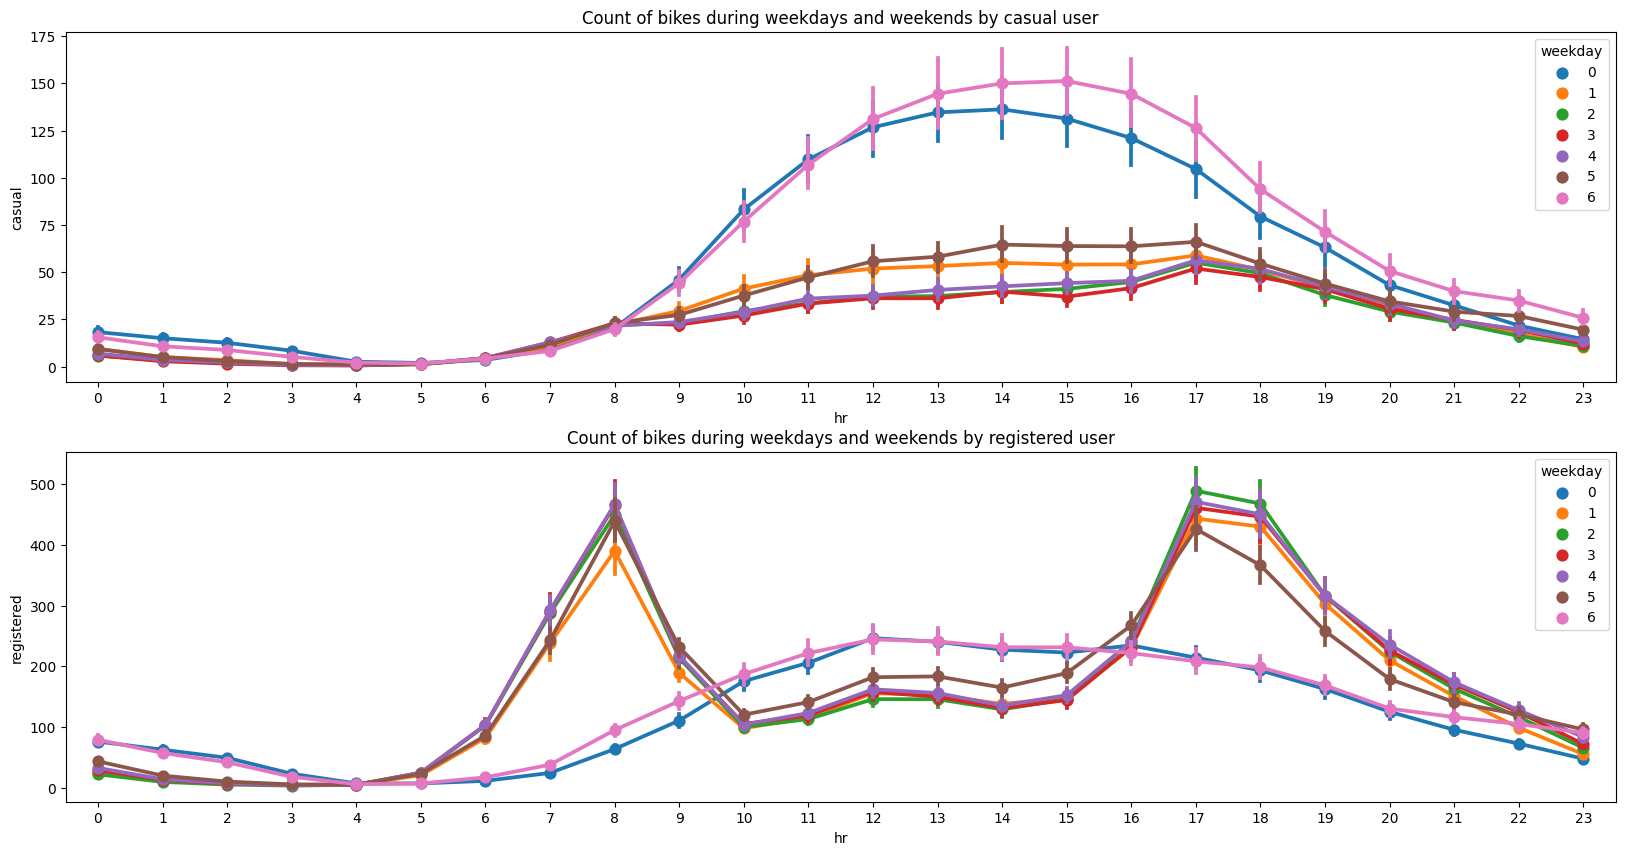

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (20,10))
sns.pointplot(data = hour_df , x ='hr' , y ='casual', hue = 'weekday',ax=ax[0])
ax[0].set(title='Count of bikes during weekdays and weekends by casual user')
sns.pointplot(data = hour_df , x ='hr' , y ='registered', hue='weekday',ax=ax[1])
ax[1].set(title='Count of bikes during weekdays and weekends by registered user')

Text(0.5, 1.0, 'Count of bikes on a week (Registered User)')

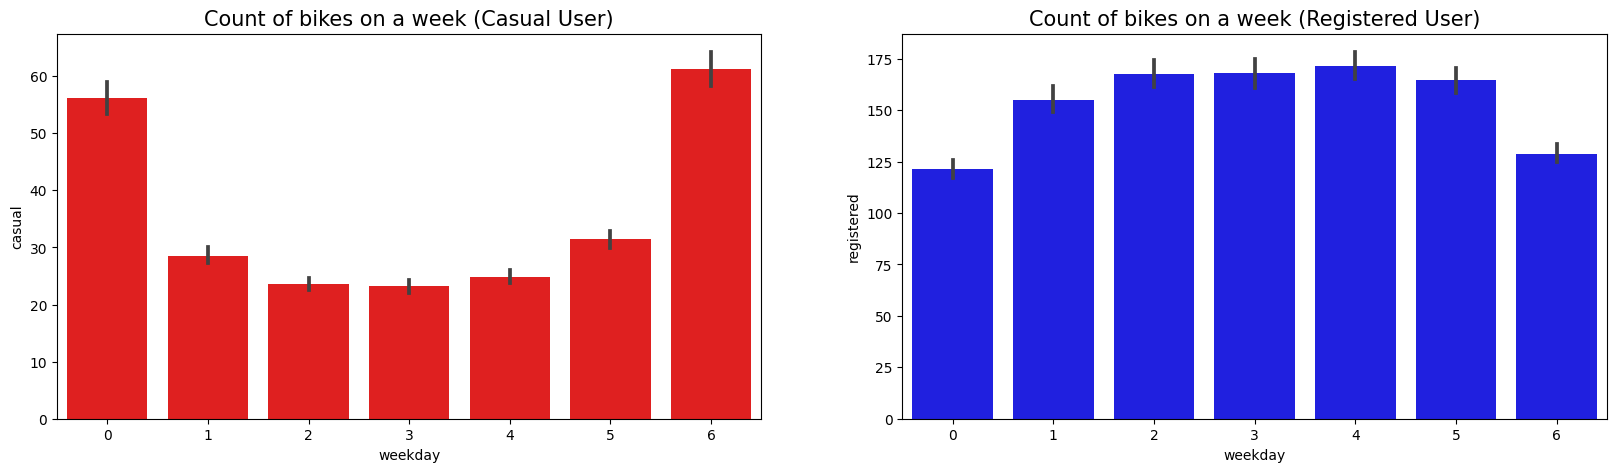

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (20,5))
sns.barplot(data = hour_df , x ='weekday' , y ='casual', color='red', ax=ax[0])
ax[0].set_title("Count of bikes on a week (Casual User)", loc="center", fontsize=15)
sns.barplot(data = hour_df , x ='weekday' , y ='registered', color='blue', ax=ax[1])
ax[1].set_title("Count of bikes on a week (Registered User)", loc="center", fontsize=15)

### 4.Bagaimana penyewaan sepeda pada saat holiday dan workingday?

[Text(0.5, 1.0, 'User by Workingday (Registered User)')]

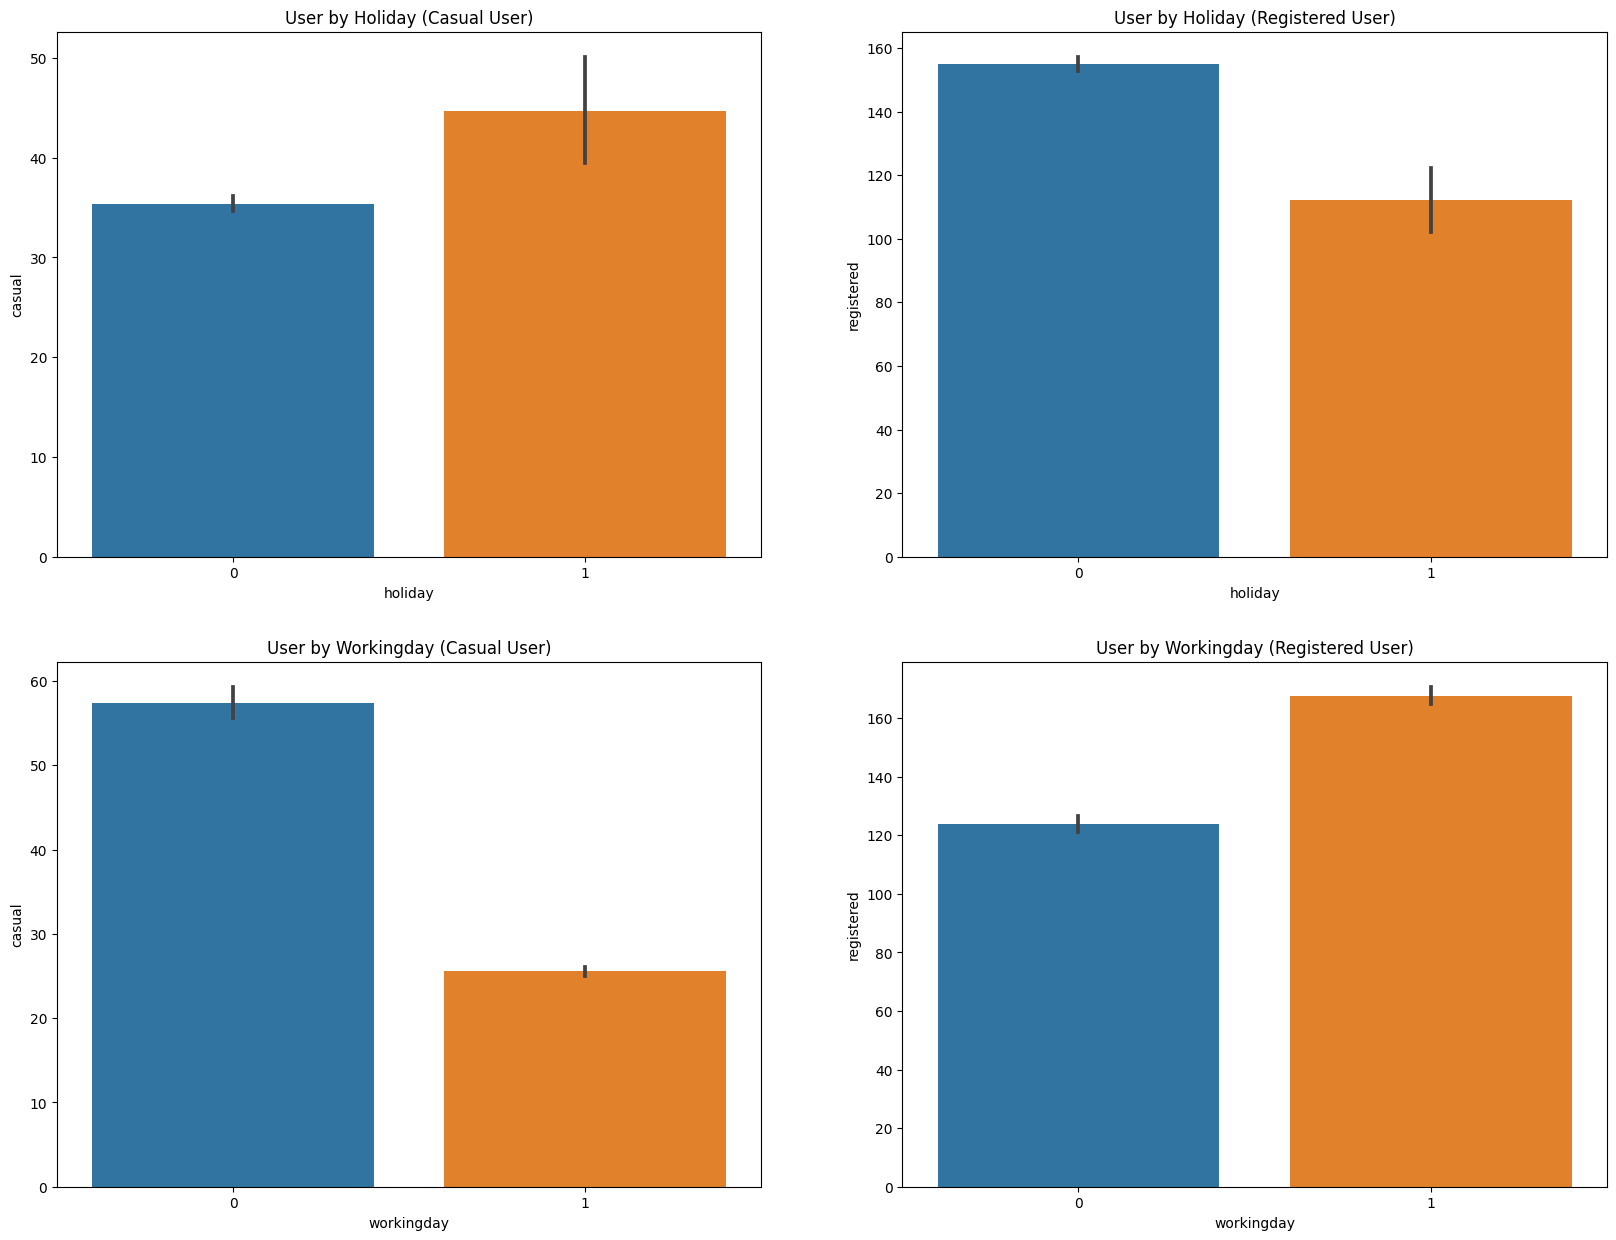

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,15))
sns.barplot(data = hour_df , x ='holiday' , y ='casual',ax=ax[0][0])
ax[0][0].set(title='User by Holiday (Casual User)')
sns.barplot(data = hour_df , x ='holiday' , y ='registered',ax=ax[0][1])
ax[0][1].set(title='User by Holiday (Registered User)')
sns.barplot(data = hour_df , x ='workingday' , y ='casual',ax=ax[1][0])
ax[1][0].set(title='User by Workingday (Casual User)')
sns.barplot(data = hour_df , x ='workingday' , y ='registered',ax=ax[1][1])
ax[1][1].set(title='User by Workingday (Registered User)')

## Kesimpulan

1. Pada musim dan cuaca apa sepeda paling banyak dan paling sedikit disewa?
**Penyewaan sepeda terbanyak ketika musim Fall dan ketika cuaca kategori 1 sedangkan sepeda paling sedikit disewa pada musim spring dan ketika cuaca kategori 4**

2. Pada pukul berapa penyewaan sepeda terbanyak?
**Secara keseluruhan peminjaman terbanyak terjadi ketika pukul 17, 18, dan 8**

3. Adakah perbedaan kebiasaan peminjaman user casual dan registered tiap harinya?
**Registered user lebih banyak melakukan peminjaman sepeda pada pagi pukul 7,8,9 dan sore pada pukul 17,18,19 pada weekday 1-6 dan peminjaman menurun ketika weekday 0 dan 7. Dapat diasumsikan kebanyakan registered user meminjam sepeda pada jam berangkat dan pulang kerja setiap hari kerja dan menjadikannya aktivitas sehari-hari.**

**Casual user lebih banyak meminjam sepeda dari pukul 9-19 pada weekday 0 dan 7 dan terdapat penurunan tingkat peminjaman pada weekday 1-6. Dapat diasumsikan kebanyakan casual user meminjam sepeda bukan untuk keperluan sehari-hari.**


4. Bagaimana penyewaan sepeda pada saat holiday dan workingday?

**Berdasarkan atribut holiday, tingkat peminjaman sepeda casual user lebih banyak dari pada ketika tidak holiday sedangkan tingkat peminjaman registered user lebih sedikit ketika holiday dari pada tidak.**

**Berdasarkan atribut workingday, casual user lebih banyak melakukan peminjaman pada saat tidak workingday sedangkan registered user lebih banyak melakukan peminjaman ketika workingday.**